<a href="https://colab.research.google.com/github/AfraHossain/Machine-Learning/blob/main/Image_Registration_method_(Predictive_interpolation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/ML/camera.jpg'

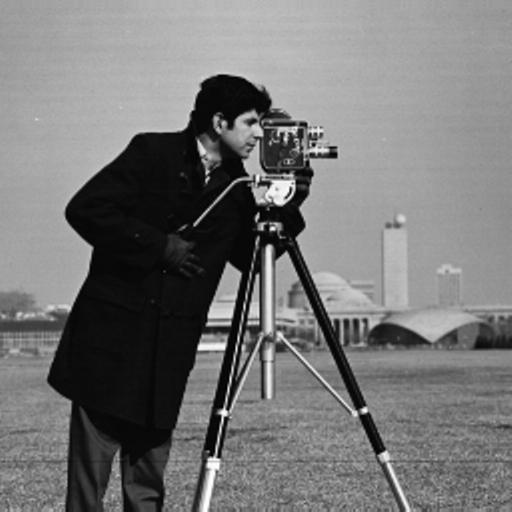

In [ ]:
from google.colab.patches import cv2_imshow
img= cv2.imread(img_path, 0)
cv2_imshow(img)

In [ ]:
# Path to save images
dest = '/content/drive/MyDrive/Colab Notebooks/ML/'

In [ ]:
# Fuction for avereging filter

def avg_filtering(img):
  m, n = img.shape
  # Averaging filter
  mask = np.ones([3,3], dtype = int)
  mask = mask / 9

  #Convolve the 3*3 mask over the image 
  img_new = np.zeros([m,n])

  for i in range(0, m-1):
    for j in range(0, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
  img_new = img_new.astype(np.uint8)
  return img_new
  

(512, 512)


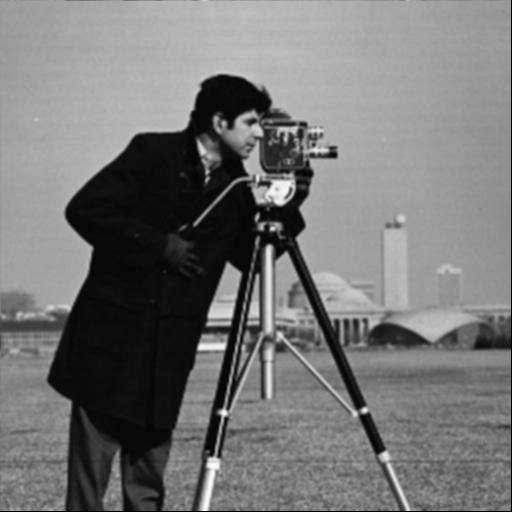

In [ ]:
# applying averaging filter to our high resolution image

smooth_img = avg_filtering(img)
print(smooth_img.shape)
cv2.imwrite(dest+'average_filtered.png', smooth_img)
cv2_imshow(smooth_img)

In [ ]:
# Function subsample image 

def subsample(img, factor, start_index):
  sub_img = np.zeros(((img.shape[0]//factor)+1, (img.shape[1]//factor)+1))
  for i in range(start_index, (img.shape[0]//factor)+1):
    for j in range(start_index,(img.shape[1]//factor)+1):
      sub_img[i,j] = img[i* factor, j* factor]
  
  return sub_img

(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)


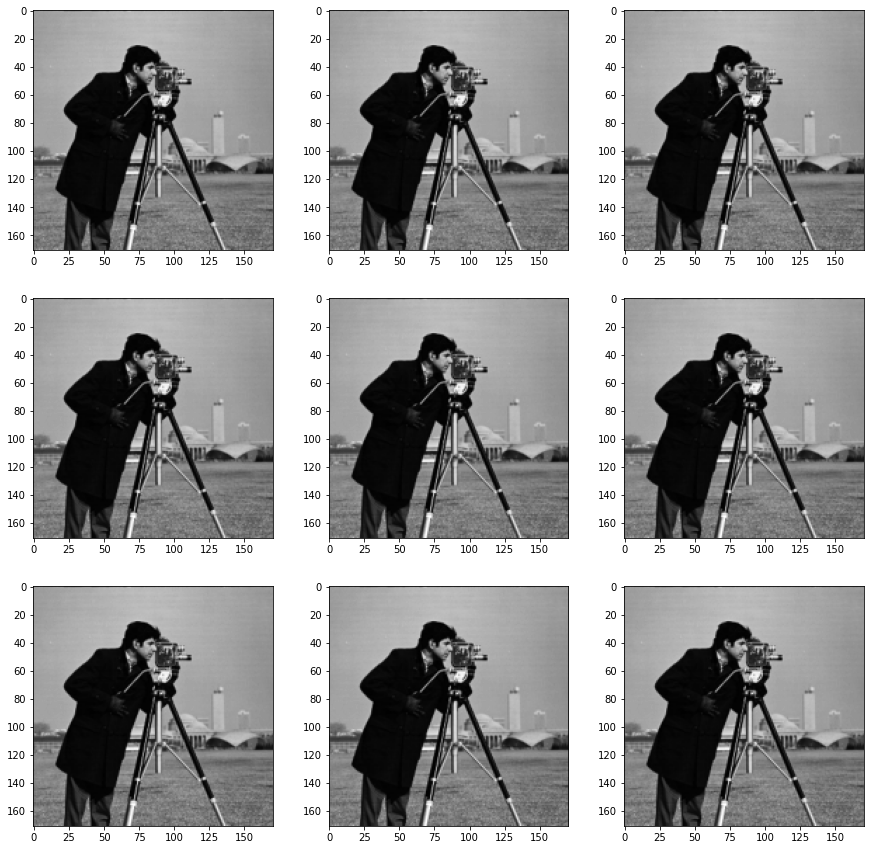

In [ ]:
# Making 9 subsample images 
# 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    # getting subsampled image
    img = subsample(smooth_img, 3, 0)
    # save that image to device
    cv2.imwrite(dest+ 'Isubsample_'+ str(i)+ '.png', img)
    #printing shape of subsampled image
    print(img.shape)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap= 'gray')
plt.show()

In [ ]:
# Shifting image
# x_shift: horizontal shift
#y_shift: vertical shift

def shift_image(img, x_shift, y_shift):
  rows, cols = img.shape
  matrix = np.float32([[1,0,x_shift], [0,1,y_shift]])
  shifted_img = cv2.warpAffine(img, matrix, (cols, rows))
  return shifted_img

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/ML/'

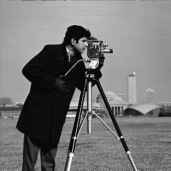

In [ ]:
g_img = cv2.imread(path+ 'Isubsample_1.png',  0)
cv2_imshow(g_img)

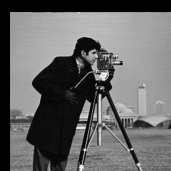

In [ ]:
g_img = shift_image(g_img,10, 12)
cv2_imshow(g_img)

In [ ]:
# shifting image 
def translate_image(img_path, x_shift, y_shift):
  img = img_path
  img = cv2.imread(img, 0)
  s_img = shift_image(img, x_shift, y_shift)
  return s_img

In [ ]:
from scipy import ndimage 

def get_local_variance(translated_image):
  win_rows, win_cols = 3, 3
  win_mean = ndimage.uniform_filter(translated_image, (win_rows, win_cols))
  win_sqr_mean = ndimage.uniform_filter(translated_image**2, (win_rows, win_cols))
  local_var_g = win_sqr_mean - win_mean**2
  return local_var_g


In [ ]:
x_offset = []
y_offset = []

(171, 171)


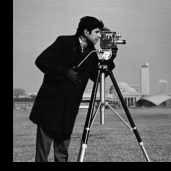

(171, 171)


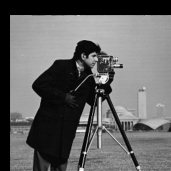

(171, 171)


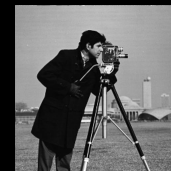

(171, 171)


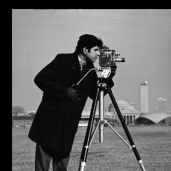

(171, 171)


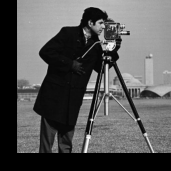

(171, 171)


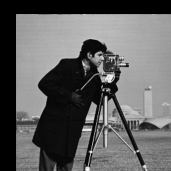

(171, 171)


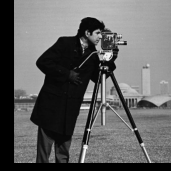

(171, 171)


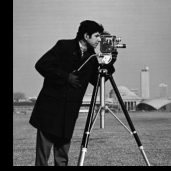

(171, 171)


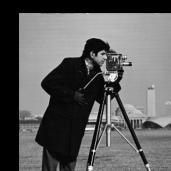

In [ ]:
# shifting images with different offsets values

# For first image 
s1_img = path+ 'Isubsample_1.png'
x1_offset, y1_offset = 13, -9
s1_img = translate_image(s1_img, x1_offset, y1_offset)
print(s1_img.shape)
cv2.imwrite(dest+ 'Itranslate_1'+  '.png', s1_img)
x_offset.append(x1_offset)
y_offset.append(y1_offset)
cv2_imshow(s1_img)

# For second image 
s2_img = path+ 'Isubsample_2.png'
x2_offset, y2_offset = 10, 15
s2_img = translate_image(s2_img, x2_offset, y2_offset)
print(s2_img.shape)
cv2.imwrite(dest+ 'Itranslate_2'+  '.png', s2_img)
x_offset.append(x2_offset)
y_offset.append(y2_offset)
cv2_imshow(s2_img)

# For third image 
s3_img = path+ 'Isubsample_3.png'
x3_offset, y3_offset = 15, 5
s3_img = translate_image(s3_img, x3_offset, y3_offset)
print(s3_img.shape)
cv2.imwrite(dest+ 'Itranslate_3'+  '.png', s3_img)
x_offset.append(x3_offset)
y_offset.append(y3_offset)
cv2_imshow(s3_img)

# For fourth image 
s4_img = path+ 'Isubsample_4.png'
x4_offset, y4_offset = 12, 9
s4_img = translate_image(s4_img, x4_offset, y4_offset)
print(s4_img.shape)
cv2.imwrite(dest+ 'Itranslate_4'+  '.png', s4_img)
x_offset.append(x4_offset)
y_offset.append(y4_offset)
cv2_imshow(s4_img)

# For fifth image 
s5_img = path+ 'Isubsample_5.png'
x5_offset, y5_offset = 17, -18
s5_img = translate_image(s5_img, x5_offset, y5_offset)
print(s5_img.shape)
cv2.imwrite(dest+ 'Itranslate_5'+  '.png', s5_img)
x_offset.append(x5_offset)
y_offset.append(y5_offset)
cv2_imshow(s5_img)


# For sisxth image 
s6_img = path+ 'Isubsample_6.png'
x6_offset, y6_offset = 16, 14
s6_img = translate_image(s6_img, x6_offset, y6_offset)
print(s6_img.shape)
cv2.imwrite(dest+ 'Itranslate_6'+  '.png', s6_img)
x_offset.append(x6_offset)
y_offset.append(y6_offset)
cv2_imshow(s6_img)


# For seventh image 
s7_img = path+ 'Isubsample_7.png'
x7_offset, y7_offset = 14, -8
s7_img = translate_image(s7_img, x7_offset, y7_offset)
print(s7_img.shape)
cv2.imwrite(dest+ 'Itranslate_7'+  '.png', s7_img)
x_offset.append(x7_offset)
y_offset.append(y7_offset)
cv2_imshow(s7_img)


# For eigth image 
s8_img = path+ 'Isubsample_8.png'
x8_offset, y8_offset = 13,-5
s8_img = translate_image(s8_img, x8_offset, y8_offset)
print(s8_img.shape)
cv2.imwrite(dest+ 'Itranslate_8'+  '.png', s8_img)
x_offset.append(x8_offset)
y_offset.append(y8_offset)
cv2_imshow(s8_img)


# For ninth image 
s9_img = path+ 'Isubsample_9.png'
x9_offset, y9_offset = 19, 13
s9_img = translate_image(s9_img, x9_offset, y9_offset)
print(s9_img.shape)
cv2.imwrite(dest+ 'Itranslate_9'+  '.png', s9_img)
x_offset.append(x9_offset)
y_offset.append(y9_offset)
cv2_imshow(s9_img) 

In [ ]:
f_img = cv2.imread(path+ 'Isubsample_1.png', 0)
print(f_img.shape)

(171, 171)


In [ ]:
g_img = cv2.imread(path+ 'Itranslate_1.png', 0)
print(g_img.shape)

(171, 171)


In [ ]:
g_img = get_local_variance(g_img)


In [ ]:
height, width = f_img.shape
print(height, width)
h_img = np.zeros((height, width))
print(h_img.shape)

171 171
(171, 171)


In [ ]:
f_img

array([[143, 148, 152, ..., 141, 145, 140],
       [156, 156, 156, ..., 153, 153, 153],
       [156, 157, 155, ..., 154, 153, 153],
       ...,
       [112, 115, 104, ..., 102, 120, 116],
       [117, 127, 108, ..., 136, 134, 117],
       [118, 126, 147, ..., 118, 132, 116]], dtype=uint8)

In [ ]:
x = np.array([(f_img[0][0], f_img[0][0+1]), (f_img[0+1][0], f_img[0+1][0+1])])
print(x)
print('---------------')
print(x.T)
print('---------------')
print(np.dot(x.T, x))
print(np.linalg.inv(np.dot(x.T, x)))
print('----------------')
y = g_img[0][0]
print('-----------------------')
print(y)
print('-----------')
print(np.dot(x.T, y))

[[143 148]
 [156 156]]
---------------
[[143 156]
 [148 156]]
---------------
[[241 188]
 [188 160]]
[[ 0.04975124 -0.05845771]
 [-0.05845771  0.07493781]]
----------------
-----------------------
0
-----------
[[0 0]
 [0 0]]


In [ ]:
def predictive_error(y, y_hat, n):
  sum = 0
  for i in range(n):
    dif = y[i] - y_hat[i]
    dif_sqr = dif**2
    sum = sum+ dif_sqr
  pred_error = sum/n
  return pred_error

In [ ]:
x_val = []
y_val = []
error_arr = np.zeros((171, 171))
for i in range(height):
  for j in range(width):
    if i+1 < height and j+1 < width:

      x = np.array([(f_img[i][j], f_img[i][j+1]), (f_img[i+1][j], f_img[i+1][j+1])])
      #x_mean = np.mean(x)
      #x = x - x_mean

      #y = g_img[i][j]
      y = local_var_g[i][j] # replacing g image with local varience 

      # calculating coofficient 
      x_invers = np.linalg.pinv(np.dot(x.T, x))
      x_trans_y = np.dot(x.T, y)

      beta = np.dot(x_invers, x_trans_y)
      #beta = np.dot((np.linalg.inv(np.dot(x.T,x))), np.dot(x.T,y))

      # predicting h(x,y)
      y_hat = beta[0][0]*x[0][0] + beta[0][1]*x[0][1] + beta[1][0]*x[1][0] + beta[1][1]*x[1][1]
      h_img[i][j] = y_hat

      # calculating predictive error
      difference = np.subtract(y, y_hat)
      squared = np.square(difference)
      mse = squared.mean() 
      error_arr[i][j] = mse


In [ ]:
print(error_arr.shape)
print(error_arr)

(171, 171)
[[       0.                0.                0.         ...
         0.                0.                0.        ]
 [       0.                0.                0.         ...
         0.                0.                0.        ]
 [       0.                0.                0.         ...
         0.                0.                0.        ]
 ...
 [       0.                0.                0.         ...
     57824.55527535    54666.4196469         0.        ]
 [       0.                0.                0.         ...
    519887.34129738 49005147.19398791        0.        ]
 [       0.                0.                0.         ...
         0.                0.                0.        ]]


(171, 171)


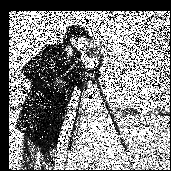

In [ ]:
print(h_img.shape)
cv2_imshow(h_img)

In [ ]:
# Get the minimum value from complete 2D numpy array
min_value = np.amin(error_arr)
print(min_value)

0.0


In [ ]:
# Get the minimum values of each column i.e. along axis 0
min_in_columns = np.amin(error_arr, axis=0)
print('min value of every column: ', min_in_columns)
len(min_in_columns)

min value of every column:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


171

In [ ]:
# Get the minimum values of each row i.e. along axis 1
min_in_rows = np.amin(error_arr, axis=1)
print('min value of every Row: ', min_in_rows)

min value of every Row:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [ ]:
# Find index of minimum value from 2D numpy array
result = np.where(error_arr == np.amin(error_arr))
print('Tuple of arrays returned : ', result)
print('List of coordinates of minimum value in Numpy array : ')
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)

Tuple of arrays returned :  (array([  0,   0,   0, ..., 170, 170, 170]), array([  0,   1,   2, ..., 168, 169, 170]))
List of coordinates of minimum value in Numpy array : 
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(0, 76)
(0, 77)
(0, 78)
(0, 79)
(0, 80)
(0, 81)
(0, 82)
(0, 83)
(0, 84)
(0, 85)
(0, 86)
(0, 87)
(0, 88)
(0, 89)
(0, 90)
(0, 91)
(0, 92)
(0, 93)
(0, 94)
(0, 95)
(0, 96)
(0, 97)
(0, 98)
(0, 99)
(0, 100)
(0, 101)
(0, 102)
(0, 103)
(0